In [2]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%autoreload 2
import sys
sys.path.insert(1, '../../SyMBac/')


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib
from matplotlib_scalebar.scalebar import ScaleBar
import tifffile
from microfilm.colorify import cmaps_def
import scipy
import statannot
import scienceplots
from seaborn import move_legend
from copy import deepcopy
plt.style.use('nature')

matplotlib.rcParams["xtick.minor.bottom"]=False
matplotlib.rcParams["xtick.top"]=False
matplotlib.rcParams["ytick.minor.left"]=False
matplotlib.rcParams["ytick.right"]=False
matplotlib.rcParams["font.size"] = 6
#matplotlib.rcParams["axes.labelpad"] = 0
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["xtick.minor.visible"] = False
matplotlib.rcParams["ytick.minor.visible"] = False
matplotlib.rcParams["xtick.direction"] = "out"
matplotlib.rcParams["ytick.direction"] = "out"
matplotlib.rcParams["legend.fontsize"] = 6
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["xtick.labelsize"] = 6
matplotlib.rcParams["ytick.labelsize"] = 6
matplotlib.rcParams["axes.titlesize"] = 6
matplotlib.rcParams["axes.labelsize"] = 6
matplotlib.rcParams["grid.alpha"] = 0
matplotlib.rcParams["savefig.transparent"] = True

resize_amount = 1
pix_mic_conv = 0.065 / 17


all_data = pd.read_pickle("../../single_cell_projection_diffraction/all_data.pickle")

wavelength_colours = ["k", "b", "g", "orange", "r"] 

standard_cell = all_data.query("`True Width` == 1.04")
max_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].max()
min_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].min()
mid_dof_membrane = standard_cell.query("`Imaging Modality` == 'membrane'")["Depth of Focus"].unique()[1]

correction_cell = standard_cell.query("`Imaging Modality` == 'membrane' & `Wavelength` == 0 & `Depth of Focus` == @max_dof_membrane").iloc[0]

max_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].max()
min_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].min()
mid_dof_FL = standard_cell.query("`Imaging Modality` == 'FL'")["Depth of Focus"].unique()[1]
high_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_FL = standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @min_dof_FL").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
mid_dof_wavelength_FL= standard_cell.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @mid_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()

high_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
low_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @min_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()
mid_dof_wavelength_membrane = standard_cell.query("`Imaging Modality` == 'membrane' & `Depth of Focus` == @mid_dof_membrane").drop(columns = ["profile", "x axis", "ID", "filename"]).drop_duplicates()


high_low_dof = pd.concat([high_dof_wavelength_FL, low_dof_wavelength_FL, high_dof_wavelength_membrane, low_dof_wavelength_membrane, mid_dof_wavelength_membrane, mid_dof_wavelength_FL])
imshow_data = all_data.loc[high_low_dof.index]

profiles = []
for index, row in imshow_data.iterrows():
    profiles.append(row["profile"])

max_int = np.max(profiles)
#profiles[0] = profiles[0]/profiles[0].max() * max_int

profiles = [x/x.max() * max_int for x in profiles]

x_axes = []
for plot_profile in profiles:
    x_axis = np.arange(0,len(plot_profile),1).astype(float)
    x_axis -= x_axis.max()/2
    x_axis *= pix_mic_conv
    x_axes.append(x_axis)

imshow_data["profile"] = profiles
imshow_data["x axis"] = x_axes
imshow_data = imshow_data.explode(["profile", "x axis"])

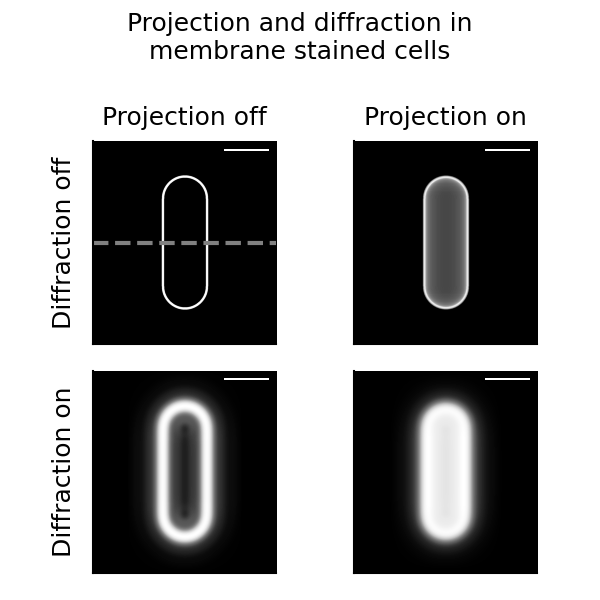

In [3]:
fig, ((mem_00, mem_10),(mem_01, mem_11)) = plt.subplots(2, 2, figsize = (2,2), dpi = 300)
mem_00.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_00.plot([mem_00.get_xlim()[0], mem_00.get_xlim()[1]],  [mem_00.get_ylim()[0]/2, mem_00.get_ylim()[0]/2], linestyle="--", c = "grey")
mem_10.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_01.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @min_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_11.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'membrane' & Wavelength == 0.7 & `Depth of Focus` == @max_dof_membrane")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )


for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])

mem_00.set_xlabel('Projection off')    
mem_00.xaxis.set_label_position('top') 
mem_00.set_ylabel("Diffraction off")

mem_10.set_xlabel("Projection on")
mem_10.xaxis.set_label_position('top') 

mem_01.set_ylabel("Diffraction on")


for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])
    scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, scale_loc="none",box_alpha=0, color="white", box_color="k") # 1 micon
    ax.add_artist(scalebar)
plt.suptitle("Projection and diffraction in\nmembrane stained cells", fontsize=6)
plt.tight_layout()
plt.savefig("a.svg")

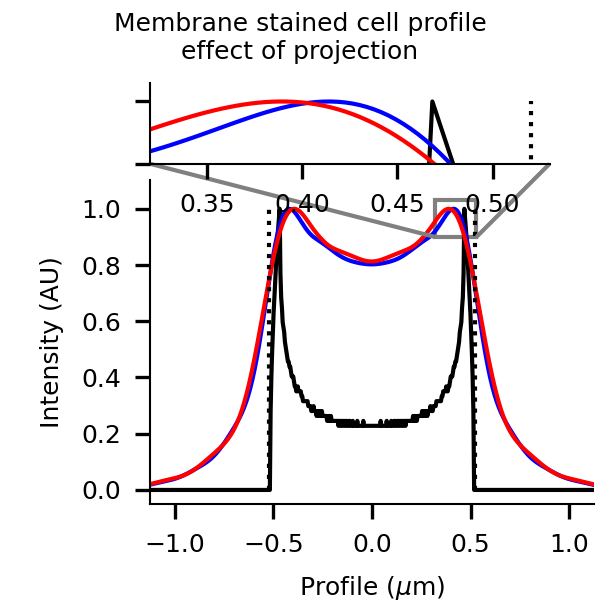

In [4]:
membrane_profile_data = deepcopy(imshow_data.query(
    "`Imaging Modality` == 'membrane' & `Depth of Focus` == @max_dof_membrane & (`Wavelength` == 0 or `Wavelength` == 0.5 or `Wavelength` == 0.7)"
))

membrane_profile_data["profile"] = membrane_profile_data["profile"] / membrane_profile_data["profile"].max()

fig, ax = plt.subplots(1,1, figsize=(2,2),  dpi = 300)

sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                         data=membrane_profile_data, palette=["black","blue", "red"], ax = ax, legend = None, )


width = imshow_data["True Width"].unique()[0]


axins2 = inset_axes(ax, 0.275 , 0.75, "upper center")
mark_inset(ax, axins2, loc1=3, loc2=4,  fc="none", ec="0.5")
sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                     data=membrane_profile_data, palette=["black","blue", "red"], ax = axins2, legend=None)
axins2.set_xlim([0.32, 0.53])
axins2.set_ylim([0.9, 1.03])
axins2.set_xlabel(None)
axins2.set_ylabel(None)
axins2.set_yticklabels([])
#axins2.set_xticklabels([])
ip = InsetPosition(ax,[0.0, 1.05, 0.9, 0.25])
axins2.set_axes_locator(ip)

ax.plot([-width/2,-width/2], [0, 1], c = "k", linestyle=":")
ax.set_xlim(ax.get_xlim()[0]*0.5, ax.get_xlim()[1]*0.5)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1.05)
ax.set_ylabel("Intensity (AU)")
ax.set_xlabel("Profile ($\mu$m)")

axins2.plot([width/2,width/2], [0, 1], c = "k", linestyle=":")
ax.plot([width/2,width/2], [0, 1], c = "k", linestyle=":")

plt.suptitle("Membrane stained cell profile\neffect of projection", fontsize=6)
fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.7)
plt.savefig("b.svg")

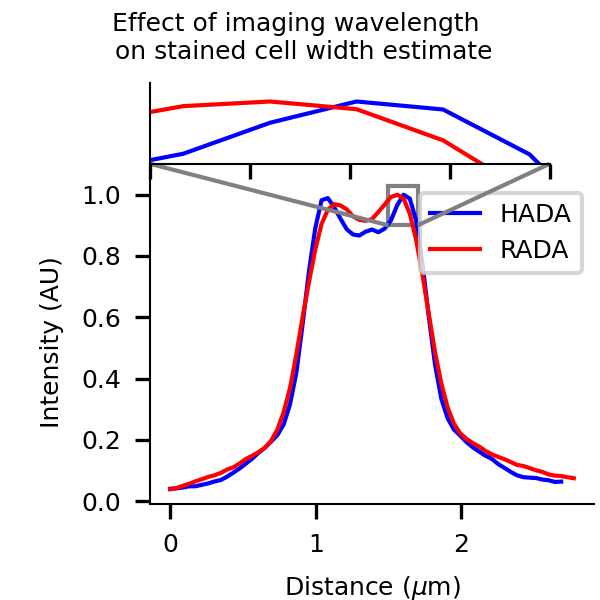

In [5]:
HADA_line = np.load("../../FDAA_width_analysis/HADA_line.npy")
RADA_line = np.load("../../FDAA_width_analysis/RADA_line.npy")

fig, HADA_RADA_PROFILE = plt.subplots(1, 1, figsize = (2,2), dpi = 300)
HADA_RADA_PROFILE.plot(np.arange(len(HADA_line[10:-5]))*0.065/1.5, HADA_line[10:-5]/HADA_line.max(), c="b", label="HADA")
HADA_RADA_PROFILE.plot(np.arange(len(RADA_line[10:-5]))*0.065/1.5, RADA_line[10:-5]/RADA_line.max(), c = "r", label = "RADA")
plt.legend()
plt.xlabel("Distance ($\mu$m)")
plt.ylabel("Intensity (AU)")
axins1 = inset_axes(HADA_RADA_PROFILE, 0.275 , 0.75, "upper center",) 

mark_inset(HADA_RADA_PROFILE, axins1, loc1=3, loc2=4, fc="none", ec="0.5")

axins1.set_yticks([])
axins1.set_xticklabels([])

axins1.plot(np.arange(len(HADA_line[10:-5]))*0.065/1.5, HADA_line[10:-5]/HADA_line.max(), c="b", label="HADA")
axins1.plot(np.arange(len(RADA_line[10:-5]))*0.065/1.5, RADA_line[10:-5]/RADA_line.max(), c = "r", label = "RADA")
axins1.set_xlim(1.5,1.7)
axins1.set_ylim(0.9,1.03)
axins1.set_xlabel(None)
axins1.set_ylabel(None)
ip = InsetPosition(ax,[0.0, 1.05, 0.9, 0.25])
axins1.set_axes_locator(ip)

plt.suptitle("Effect of imaging wavelength \n on stained cell width estimate", fontsize=6)
fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.7)
plt.savefig("c.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RADA v.s. HADA: t-test independent samples with Bonferroni correction, P_val=4.183e-15 stat=-8.324e+00


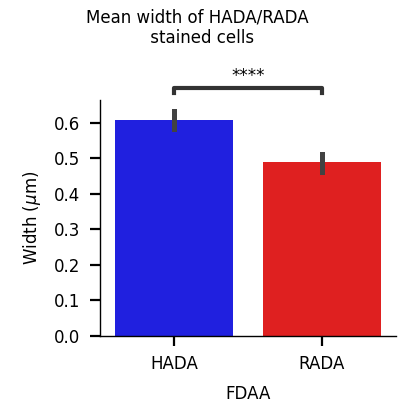

In [6]:
barplot_data = pd.read_pickle("../../FDAA_width_analysis/barplot_data.pickle")
width_data = pd.read_pickle("../../FDAA_width_analysis/plotting_data.pickle")

fig, WIDTH_BARPLOT = plt.subplots(1, 1, figsize = (2,2), dpi = 200)

stat, pvalue = scipy.stats.ttest_ind(width_data["RADA"], width_data["HADA"])

sns.barplot(data=barplot_data, y = "value", x = "variable", errorbar=('ci', 99), ax=WIDTH_BARPLOT, palette=["blue", "red"], order = ["HADA", "RADA"])
statannot.add_stat_annotation(
    WIDTH_BARPLOT,
    data=barplot_data, y = "value", x = "variable",
    box_pairs=[
        (("HADA"), ("RADA")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="outside"
)
plt.ylabel("Width ($\mu$m)")
plt.xlabel("FDAA")
plt.suptitle("Mean width of HADA/RADA \n stained cells", fontsize=6)
fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.75)
plt.savefig("d.svg")

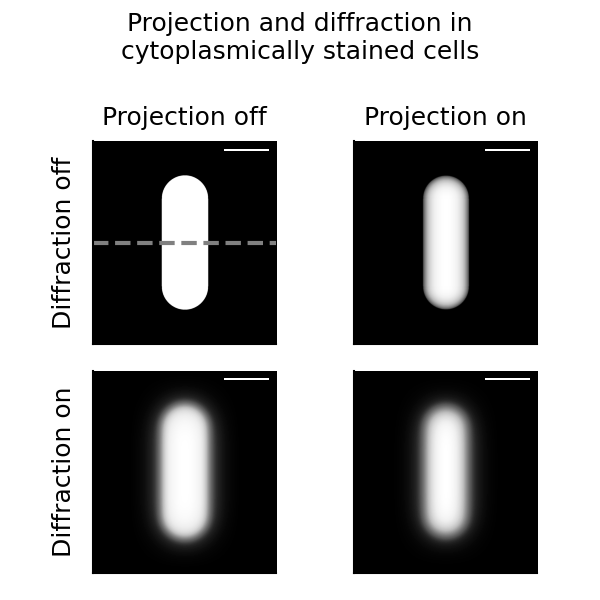

In [7]:
fig, ((mem_00, mem_10),(mem_01, mem_11)) = plt.subplots(2, 2, figsize = (2,2), dpi = 300)
mem_00.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'FL' & Wavelength == 0 & `Depth of Focus` == @min_dof_FL")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_00.plot([mem_00.get_xlim()[0], mem_00.get_xlim()[1]],  [mem_00.get_ylim()[0]/2, mem_00.get_ylim()[0]/2], linestyle="--", c = "grey")
mem_10.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'FL' & Wavelength == 0 & `Depth of Focus` == @max_dof_FL")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_01.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'FL' & Wavelength == 0.7 & `Depth of Focus` == @min_dof_FL")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )
mem_11.imshow( np.load('../../single_cell_projection_diffraction/'+imshow_data.query("`Imaging Modality` == 'FL' & Wavelength == 0.7 & `Depth of Focus` == @max_dof_FL")["filename"].iloc[0])[200:-200,:], cmap="Greys_r" )


for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])

mem_00.set_xlabel('Projection off')    
mem_00.xaxis.set_label_position('top') 
mem_00.set_ylabel("Diffraction off")

mem_10.set_xlabel("Projection on")
mem_10.xaxis.set_label_position('top') 

mem_01.set_ylabel("Diffraction on")


for ax in [mem_00, mem_10, mem_01, mem_11]:
    ax.set_xticks([])
    ax.set_yticks([])
    scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.25, scale_loc="none",box_alpha=0, color="white", box_color="k") # 1 micon
    ax.add_artist(scalebar)
plt.suptitle("Projection and diffraction in\ncytoplasmically stained cells", fontsize=6)
plt.tight_layout()
plt.savefig("e.svg")

/tmp/ipykernel_2611008/1831378415.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles
/tmp/ipykernel_2611008/1831378415.py:45: UserWarning: Legend does not support handles for NoneType instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  wavelength_ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(-.15, 1),


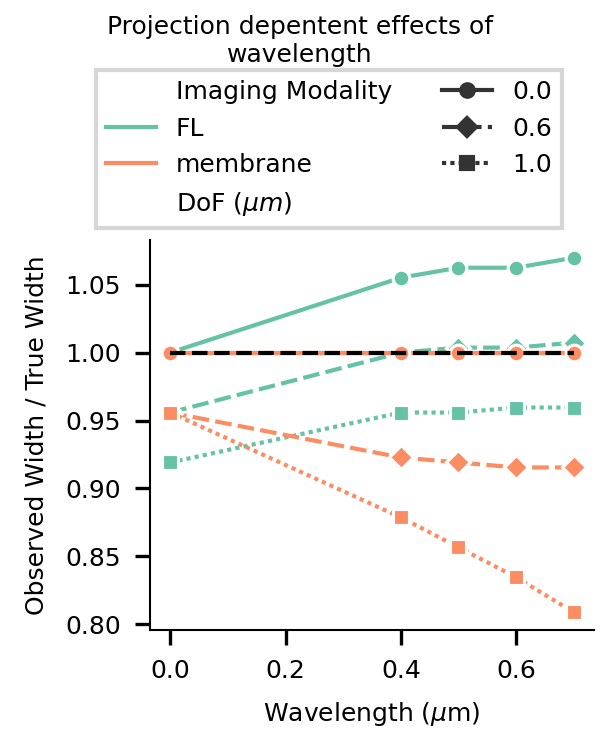

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Create the main figure
fig, wavelength_ax = plt.subplots(1, 1, figsize=(2, 2.5), dpi=300)

p = sns.lineplot(x="Wavelength", y="Observed Width / True Width", 
                 data=high_low_dof.query("`Imaging Modality` == 'membrane' or `Imaging Modality` == 'FL'"),
                 style="Depth of Focus", hue="Imaging Modality",
                 markers=["o", "D", "s"], markersize=4, ax=wavelength_ax, palette="Set2")

# Customize plot and legend
plt.xlabel(" ")
plt.plot([0, 0.7], [1, 1], color="k", linestyle="--")
plt.xlabel("Wavelength ($\mu$m)")
plt.suptitle("Projection depentent effects of\nwavelength", fontsize=6)

leg = p.legend_
for t in leg.texts:
    if any([x in t.get_text() for x in ["Imag", "FL", "memb", "Depth"]]):
        pass
    else:
        t.set_text(t.get_text()[:3])

    if "Depth" in t.get_text():
        t.set_text("DoF ($\mu m$)")

handles = leg.legendHandles
labels = [t.get_text() for t in leg.texts]

# Find the index where you want to insert the empty item (after "Membrane")
insert_index = labels.index("membrane") + 2

# Insert None as the handle and an empty string as the label
handles.insert(insert_index, None)
labels.insert(insert_index, "")

# Remove the original legend
leg.remove()

# Create a new legend with the modified handles and labels
wavelength_ax.legend(handles, labels, loc='lower left', bbox_to_anchor=(-.15, 1),
                     ncol=2, fancybox=False, shadow=False)


fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.85 * 2/2.5)
plt.show()


# Remove legend from first figure
#leg.remove()

#Create new figure for the legend
#fig2 = plt.figure()
#ax2 = fig2.add_subplot()
#ax2.axis('off')#
## Transfer modified legend to the new figure
#fig2.legend(leg.legendHandles, [t.get_text() for t in leg.texts], loc='center')

# Save and display plots
#plt.tight_layout()
#fig.savefig("g.svg")
#fig2.savefig("g_legend.svg")


/tmp/ipykernel_2611008/361626421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_data["profile"] = profile_data["profile"] / profile_data["profile"].max()


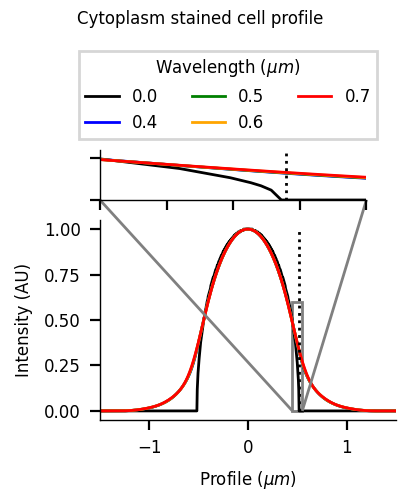

In [134]:
fig, ax = plt.subplots(1, 1, figsize = (2,2.5), dpi = 200)

profile_data = imshow_data.query("`Imaging Modality` == 'FL' & `Depth of Focus` == @max_dof_membrane")

profile_data["profile"] = profile_data["profile"] / profile_data["profile"].max()


sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                     data=profile_data, palette=wavelength_colours, ax = ax,)
plt.xlim(-1.5,1.5)
width = imshow_data["True Width"].unique()[0]

axins1 = inset_axes(ax, 0.7 ,0.9, "upper center",) #zoomed_inset_axes(ax, 5, loc="lower center", bbox_to_anchor=(10,-100))

mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5")
sns.lineplot(x="x axis", y="profile", hue = "Wavelength",
                     data=profile_data, palette=wavelength_colours, ax = axins1, legend = None)
axins1.set_xlim([0.45, 0.55])
axins1.set_ylim([0.0, 0.6])
axins1.set_xlabel(None)
axins1.set_ylabel(None)
axins1.set_yticklabels([])
axins1.set_xticklabels([])

axins1.plot([width/2,width/2], [0, 1], c = "k", linestyle=":")
ax.plot([width/2,width/2], [0, 1], c = "k", linestyle=":")
ip = InsetPosition(ax,[0.0, 1.1, 0.9, 0.25])
axins1.set_axes_locator(ip)

ax.set_xlabel("Profile ($\mu m$)")

ax.set_ylabel("Intensity (AU)")

ax.legend(loc='lower left', bbox_to_anchor=(-0.1, ax.get_ylim()[1]*1.3),
          ncol=3, fancybox=False, shadow=False, title='Wavelength ($\mu m$)')

plt.suptitle("Cytoplasm stained cell profile", fontsize=6)
fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.7*2/2.5)
plt.savefig("e.svg")
plt.show()

In [36]:
key

'membrane'

In [38]:
ax.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7f8a7b4702e0>,
 ['FL', 'membrane', 'FL', 'membrane'])

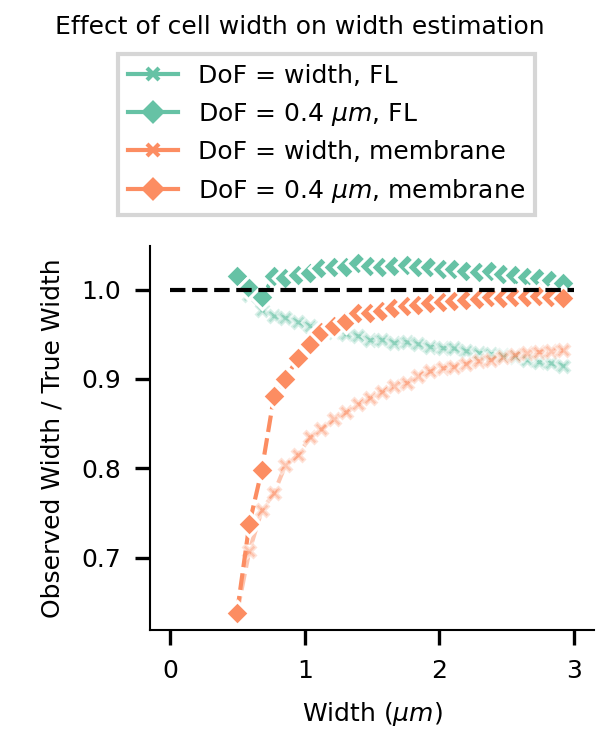

In [113]:
fig, WIDTH_DEPENDENCE = plt.subplots(1, 1, figsize = (2,2.5), dpi = 300)
estimation_width_data = all_data[np.isclose(all_data["Depth of Focus"], all_data["True Width"], rtol=0.05)].query("Wavelength == 0.6")

# Using 'style' for marker types and 'hue' for colors
ax = sns.lineplot(data=estimation_width_data, x="True Width", y="Observed Width / True Width", hue="Imaging Modality", style="Imaging Modality", markers=["X", "X"], markersize=4, palette="Set2", alpha=0.5, errorbar = None)
sns.lineplot(data=all_data.query("(0.7 > `Depth of Focus` > 0.41 & Wavelength == 0.6)"), x="True Width", y="Observed Width / True Width", hue="Imaging Modality", style="Imaging Modality", markers=["D", "D"], markersize=4, palette="Set2", alpha=1, errorbar=None)

color_mapping = {"FL": sns.color_palette("Set2")[0], "membrane": sns.color_palette("Set2")[1]}

# Create custom legend handles
handles = []
labels = []

for modality, color in color_mapping.items():
    # For 'X' marker
    line, = plt.plot([], [], color=color, marker='x', label=f"DoF = width, {modality}")
    handles.append(line)
    labels.append(f"DoF = width, {modality}")
    
    # For 'D' marker
    line, = plt.plot([], [], color=color, marker='D', linestyle='-', label=f"DoF = 0.4 $\mu m$, {modality}")
    handles.append(line)
    labels.append(f"DoF = 0.4 $\mu m$, {modality}")

# Add the custom handles to the legend
ax.legend(handles=handles, labels=labels, loc='lower left', bbox_to_anchor=(-0.1, ax.get_ylim()[1]),
          ncol=1, fancybox=False, shadow=False)

# Other plot modifications
plt.xlabel("Width ($\mu m$)")
plt.plot([0,3],[1,1],color="k",linestyle="--")
plt.suptitle("Effect of cell width on width estimation", fontsize=6)
fig.subplots_adjust(left=0.25, bottom=0.16, right=0.99, top=0.84 * 2/2.5)
plt.savefig("f.svg")

In [99]:
 ax.get_ylim()

(0.6189160361496427, 1.0489170870113493)

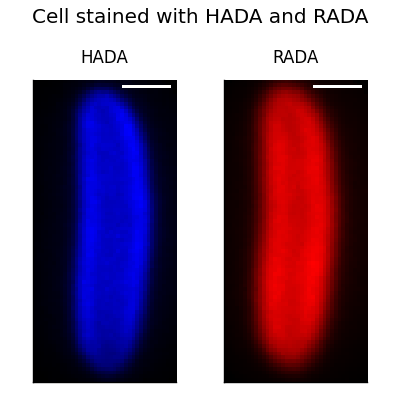

In [154]:
fig, (HADA_IMSHOW, RADA_IMSHOW) = plt.subplots(1, 2, figsize = (2,2), dpi = 200)

for ax in [HADA_IMSHOW, RADA_IMSHOW]:
    ax.set_xticks([])
    ax.set_yticks([])

HADA_cell = np.rot90(tifffile.imread("../../FDAA_width_analysis/HADA_cell.tif"))[:,20:-20]
RADA_cell = np.rot90(tifffile.imread("../../FDAA_width_analysis/RADA_cell.tif"))[:,20:-20]

HADA_IMSHOW.imshow(HADA_cell**1.5, cmap=cmaps_def("pure_blue"))
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.5, scale_loc="none", box_alpha=0, color="white", box_color="k") # 1 micon
HADA_IMSHOW.add_artist(scalebar)

RADA_IMSHOW.imshow(RADA_cell**1.5, cmap=cmaps_def("pure_red"))
scalebar = ScaleBar(pix_mic_conv, "um", length_fraction=0.5, scale_loc="none", box_alpha=0, color="white", box_color="k") # 1 micon
RADA_IMSHOW.add_artist(scalebar)

RADA_IMSHOW.set_title("RADA")
HADA_IMSHOW.set_title("HADA")
plt.suptitle("Cell stained with HADA and RADA")
plt.tight_layout()
plt.savefig("cells.svg")

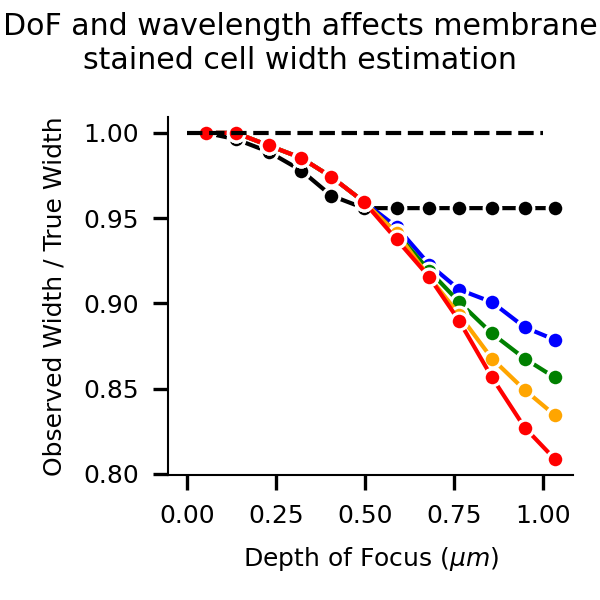

In [22]:
#plt.text(-.2, 1.165, 'c)', ha='left', va='top', transform=MEMBRANE_DOF.transAxes)
temp = deepcopy(standard_cell.query("`Imaging Modality` == 'membrane'"))
fig, ax = plt.subplots(1,1, figsize=(2,2), dpi = 300)

sns.lineplot(x="Depth of Focus", y="Observed Width / True Width", hue = "Wavelength",
     data=temp, palette=wavelength_colours, marker= "o", markersize=4, legend = None)
#plt.title("Width = 1, Imaging Modality = Membrane")
plt.xlabel("Depth of Focus ($\mu m$)")
plt.plot([0,1],[1,1],color = "k", linestyle="--")
plt.suptitle("DoF and wavelength affects membrane\nstained cell width estimation")
plt.tight_layout()
#plt.savefig("b.svg")